#Tugas 1 _ PML _ (Week 1)
---
**Nama : Dwi Ahmad Dzulhijjah <br>
NPM  : 2408207010012**

---
> Deskripsi tugas : "Implementasikan MTCNN dengan 20 gambar acak dari 20 unik orang, dengan mengacu pada : https://github.com/ipazc/mtcnn"

## Preparing the Datasets

In [ ]:
!pip install opencv-python

In [ ]:
!cd /content/drive/MyDrive/USK/ML/

In [ ]:
!python /content/drive/MyDrive/USK/ML/download.py

Streaming output truncated to the last 5000 lines.
Failed to download http://www.contactmusic.com/pics/la/title_arrivals_180708/s_epatha_merkerson_1980996.jpg (HTTP 404)
Downloading: /content/drive/MyDrive/USK/ML/download/S._Epatha_Merkerson/d00fdfbb45058dbdc8d541915b12a3bce986b6af.jpg
Downloading: /content/drive/MyDrive/USK/ML/download/Eva_Longoria/c000d7b1ac92ecb0ca43bdd39ce197906784a5ba.jpg
Downloading: /content/drive/MyDrive/USK/ML/download/Eva_Longoria/f22eb482e74f7edc1c3a8d0fce54cf5a8f54f363.jpg
Downloading: /content/drive/MyDrive/USK/ML/download/Eva_Longoria/5868adf84d8e2afc57ade43f498e80945326167c.jpg
Failed to download http://www.hollywoodreporter.com/sites/default/files/2013/08/eva_longoria_jonah_hill_hfpa_a_l.jpg (HTTP 404)
Downloading: /content/drive/MyDrive/USK/ML/download/Eva_Longoria/aadeb8aaf9e9213a6ac8cdfffeab14b46bc9a813.jpg
Failed to download http://celebritiestown.com/wp-content/uploads/2013/01/Eva-Longoria_picture.jpg (HTTP 404)
Downloading: /content/drive/MyDrive/

## Make Sure Library Installation

In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00


In [5]:
import os
import random
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from PIL import Image
import numpy as np

## GPU Check and Setting

In [6]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

CUDA available: True
Device: NVIDIA A100-SXM4-40GB


In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Important Library

In [8]:
# Path to the dataset
base_dir = "/content/drive/MyDrive/USK/ML/download/"

## Data Pre-processing

In [ ]:
import os
import cv2

dataset_path = "/content/drive/MyDrive/USK/ML/download/"
valid_images = []

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):  # Pastikan ini adalah folder
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)

            # **Perbaikan: Cek apakah img_path adalah file sebelum os.remove()**
            if os.path.isdir(img_path):
                print(f"Skipping directory: {img_path}")
                continue  # Lewati folder

            try:
                img = cv2.imread(img_path)
                if img is not None and img.shape[0] > 0:
                    valid_images.append(img_path)  # Simpan file valid
                else:
                    os.remove(img_path)  # Hapus file corrupt
            except:
                os.remove(img_path)  # Hapus jika error

print(f"Total valid images: {len(valid_images)}")

Skipping directory: /content/drive/MyDrive/USK/ML/download/Aaron_Eckhart/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Billy_Boyd/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Adam_Brody/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Billy_Burke/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Billy_Zane/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Adam_McKay/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Adam_Sandler/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Brad_Garrett/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Adrien_Brody/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Brad_Pitt/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Al_Pacino/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Bradley_Cooper/face
Skipping directory: /content/drive/MyDrive/USK/ML/download/Alan_Alda/face
Skipping direc

In [10]:
# Get all person folders
person_names = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Randomly select 20 unique persons
selected_persons = random.sample(person_names, min(20, len(person_names)))

## Main Code for Cropping using MTCNN

In [16]:
detector = MTCNN()

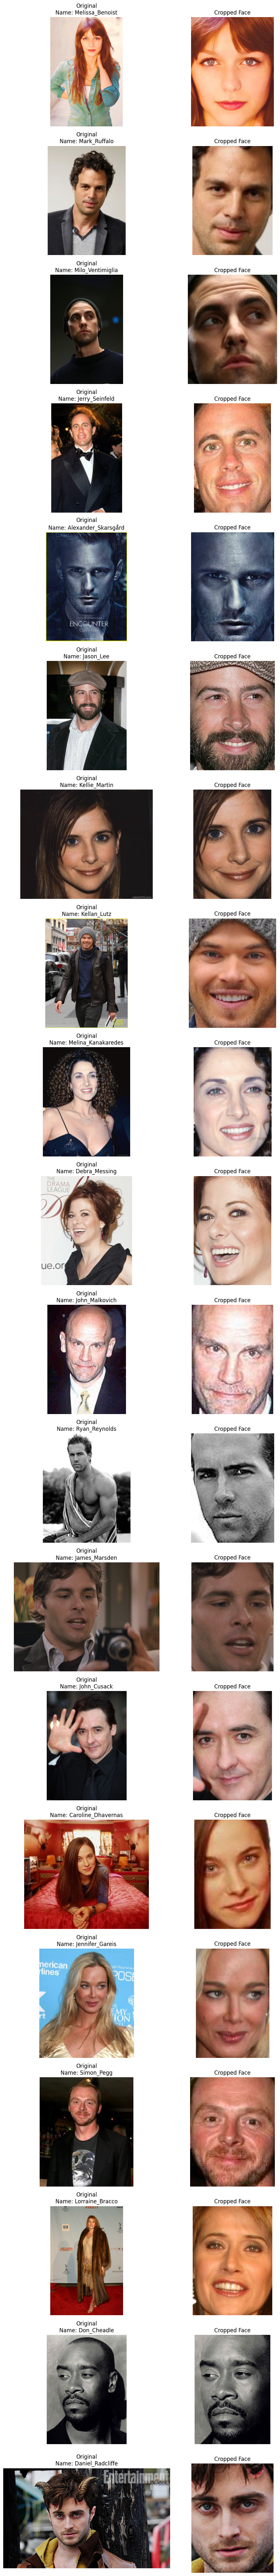

In [17]:
# Prepare the plot
fig, axes = plt.subplots(len(selected_persons), 2, figsize=(10, len(selected_persons) * 4))

for i, person_name in enumerate(selected_persons):
    image_dir = os.path.join(base_dir, person_name)
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('jpg', 'jpeg', 'png'))]

    if not image_files:
        continue

    # Select a random image from the person's folder
    image_file = random.choice(image_files)
    image_path = os.path.join(image_dir, image_file)
    original_img = Image.open(image_path).convert("RGB")
    image = np.array(original_img)

    # Detect faces
    result = detector.detect_faces(image)

    cropped_img = None

    if result:
        # Get bounding box of the first detected face
        x, y, width, height = result[0]['box']
        x, y = max(0, x), max(0, y)
        cropped_img = original_img.crop((x, y, x + width, y + height))
    else:
        cropped_img = Image.new("RGB", (100, 100), color=(255, 0, 0))  # Red box if no face detected

    # Display images
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title(f"Original\nName: {person_name}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(cropped_img)
    axes[i, 1].set_title(f"Cropped Face")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()